<a href="https://colab.research.google.com/github/cmartinez4269/Carina-Martinez-DS-1002/blob/main/Copy_of_Carina_Martinez_06_pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1

1. Import dependencies

In [ ]:
import pandas as pd

---

In [ ]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [ ]:
p_series = pd.Series(list)
print(p_series)

0    98
1    24
2    46
3    87
4    33
dtype: int64


3. Take the above series and add an index that starts at 2 and steps by 3

In [ ]:
index = range(2,2 + len(list) * 3, 3)
pseries_index = pd.Series(list, index=index)
print(pseries_index)

2     98
5     24
8     46
11    87
14    33
dtype: int64


4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [ ]:
data = {
    'Name': ['Christine', 'Maya', 'Jaco', 'Olivia'],
    'Age': [21, 22, 19, 20],
    'Career': ['Painter', 'DJ', 'Data Analyst', 'Nurse']
}
df = pd.DataFrame(data)
print(df)

        Name  Age        Career
0  Christine   21       Painter
1       Maya   22            DJ
2       Jaco   19  Data Analyst
3     Olivia   20         Nurse


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [ ]:
df.index.name = 'participant_id'
print(df)

                     Name  Age        Career
participant_id                              
0               Christine   21       Painter
1                    Maya   22            DJ
2                    Jaco   19  Data Analyst
3                  Olivia   20         Nurse


6. Use a pandas function to determine the data types of the columns of `df`.

In [ ]:
print(df.dtypes)

Name      object
Age        int64
Career    object
dtype: object


7. Using bracket notation, reference column `name`

In [ ]:
name_b = df['Name']
print(name_b)

participant_id
0    Christine
1         Maya
2         Jaco
3       Olivia
Name: Name, dtype: object


8. Using dot notation, reference column `name`

In [ ]:
name_d = df.Name
print(name_d)

participant_id
0    Christine
1         Maya
2         Jaco
3       Olivia
Name: Name, dtype: object


8. Reference column `name` and have it returned in a dataframe.

In [ ]:
name_df = df[['Name']]
print(name_df)

                     Name
participant_id           
0               Christine
1                    Maya
2                    Jaco
3                  Olivia


9. Show the 3rd element in column `career`.

In [ ]:
third_element_career = df['Career'].iloc[2]
print(third_element_career)

Data Analyst


10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target
print(iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [ ]:
correlation = iris['sepal length (cm)'].corr(iris['sepal width (cm)'])
print('The correlation betwen sepal_length and sepal_width is', correlation,'.')

The correlation betwen sepal_length and sepal_width is -0.11756978413300208 .


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [ ]:
correlation_setosa = iris[iris['species'] == 0]['sepal length (cm)'].corr(iris[iris['species'] == 0]['sepal width (cm)'])
correlation_versicolor = iris[iris['species'] == 1]['sepal length (cm)'].corr(iris[iris['species'] == 1]['sepal width (cm)'])
correlation_virginica = iris[iris['species'] == 2]['sepal length (cm)'].corr(iris[iris['species'] == 2]['sepal width (cm)'])

max_correlation = max(correlation_setosa, correlation_versicolor, correlation_virginica)
if max_correlation == correlation_setosa:
  highest_correlation = 'Setosa'
elif max_correlation == correlation_versicolor:
  highest_correlation = 'Versicolor'
else:
  highest_correlation = 'Virginica'
print('The species with the highest correlation between sepal_length and sepal_width is', highest_correlation, '.')


The species with the highest correlation between sepal_length and sepal_width is Setosa .


13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative (or the least positive) correlation?  Again, include calculations to support your answer.

In [ ]:
overall_correlations_matrix = iris.corr()
overall_neg_correlations = overall_correlations_matrix.unstack().sort_values().head(5)
print('Values for Most Negatively Correlated Variables Overall:')
print(overall_neg_correlations)


Values for Most Negatively Correlated Variables Overall:
sepal width (cm)   petal length (cm)   -0.428440
petal length (cm)  sepal width (cm)    -0.428440
species            sepal width (cm)    -0.426658
sepal width (cm)   species             -0.426658
petal width (cm)   sepal width (cm)    -0.366126
dtype: float64


After assessing the negative correlations for the iris variables through calculations, we can see that the overall most negative correlation is tied between *sepal width and petal length* and *petal length and sepal width*.

In [ ]:
def species_neg_correlations(species):
  species_df = iris[iris['species'] == species]
  species_corr_matrix = species_df.corr()
  species_neg_correlations = species_corr_matrix.unstack().sort_values().head(5)
  return species_neg_correlations

neg_corr_setosa = species_neg_correlations(0)
print('\nMost Negatively Correlated Variables for Setosa:')
print(neg_corr_setosa)

neg_corr_versicolor = species_neg_correlations(1)
print('\nMost Negatively Correlated Variables for Versicolor:')
print(neg_corr_versicolor)

neg_corr_virginica = species_neg_correlations(2)
print('\nMost Negatively Correlated Variables for Virginica:')
print(neg_corr_virginica)


Most Negatively Correlated Variables for Setosa:
sepal width (cm)   petal length (cm)    0.177700
petal length (cm)  sepal width (cm)     0.177700
sepal width (cm)   petal width (cm)     0.232752
petal width (cm)   sepal width (cm)     0.232752
sepal length (cm)  petal length (cm)    0.267176
dtype: float64

Most Negatively Correlated Variables for Versicolor:
sepal length (cm)  sepal width (cm)     0.525911
sepal width (cm)   sepal length (cm)    0.525911
sepal length (cm)  petal width (cm)     0.546461
petal width (cm)   sepal length (cm)    0.546461
sepal width (cm)   petal length (cm)    0.560522
dtype: float64

Most Negatively Correlated Variables for Virginica:
sepal length (cm)  petal width (cm)     0.281108
petal width (cm)   sepal length (cm)    0.281108
petal length (cm)  petal width (cm)     0.322108
petal width (cm)   petal length (cm)    0.322108
sepal width (cm)   petal length (cm)    0.401045
dtype: float64


For **Setosa**, the variables with the most negative correlation were tied between *sepal width and petal length*, and *sepal length and sepal width*.

For **Versicolor**, it was tied between *sepal length and sepal width*, and *sepal width and sepal length*.

For **Virginica**, it was tied betwen *sepal length and petal width*, and *petal width and sepal length*.

14.  Once again, the variables `sepal_width` and `petal_length` are negatively correlated.  But for each individual species, these two variables are positively correlated.  How is this possible?  Explain this phenomenon.  Use a data visualization if it helps.


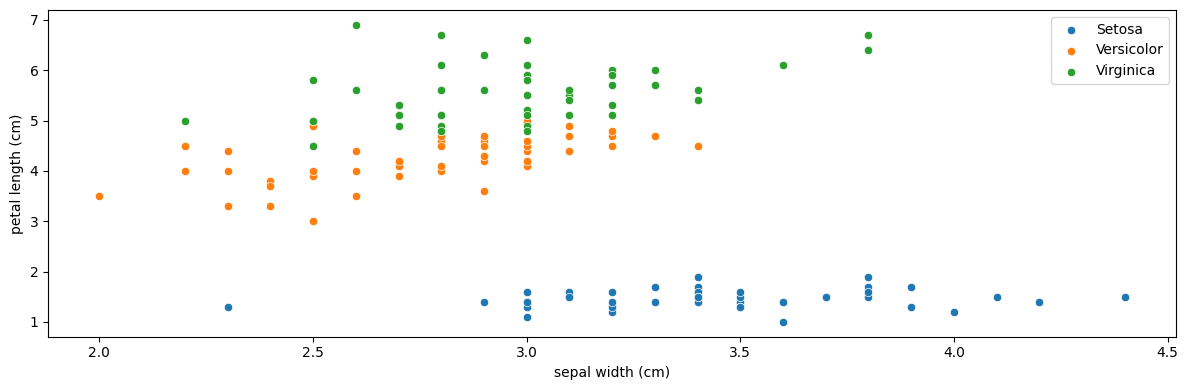

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))
sns.scatterplot(data=iris[iris['species'] == 0], x='sepal width (cm)', y='petal length (cm)', label= 'Setosa')
sns.scatterplot(data=iris[iris['species'] == 1], x='sepal width (cm)', y='petal length (cm)', label= 'Versicolor')
sns.scatterplot(data=iris[iris['species'] == 2], x='sepal width (cm)', y='petal length (cm)', label= 'Virginica')
plt.tight_layout()
plt.show()

As we can see with the aggragated values for each species, the overall negative correlation is due to the decrease in petal length-sepal length relationship among Setosa values that results in a negative trajectory.